# Read Phytoplankton.ncdf 

this R notebook reads (and cleans up) the Phytoplankton ncdf file that is provided on  
  
https://www.bco-dmo.org/dataset/3095

This .ncdf file is a collection of monthly Phytoplankton Samplings at CARIACO Ocean Time Series Station.

In [1]:
#install.packages("ncdf4")
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);

Loading required package: ncdf4
Loading required package: ggplot2
Loading required package: cowplot

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [2]:
# open a NetCDF file
phydat <- nc_open("../VeryNEWESTCariacoData/phytoplankton.netcdf")

print(phydat)

File ../VeryNEWESTCariacoData/phytoplankton.netcdf (NC_FORMAT_CLASSIC):

     26 variables (excluding dimension variables):
        char Cruise[maxlen_,unlimited]   
        char Cruise_ID_2[maxlen_,unlimited]   
        char Leg[maxlen_,unlimited]   
        char Cast[maxlen_,unlimited]   
        char Day_local[maxlen_,unlimited]   
        char Month_local[maxlen_,unlimited]   
        char Year_local[maxlen_,unlimited]   
        char Latitude[maxlen_,unlimited]   
        char Longitude[maxlen_,unlimited]   
        char Time_start_local[maxlen_,unlimited]   
        char Time_end_local[maxlen_,unlimited]   
        char Datetime_local[maxlen_,unlimited]   
        char Datetime_UTC[maxlen_,unlimited]   
        char SpeciesNameOriginal[maxlen_,unlimited]   
        char SpeciesNameCleaned[maxlen_,unlimited]   
        char ScientificName_accepted[maxlen_,unlimited]   
        char AphiaID[maxlen_,unlimited]   
        char d_1m[maxlen_,unlimited]   
        char d_7m[maxlen_,unli

# Read entire ncdf file to r DataFrame

In [3]:
phydat_df <- data.frame("Num" = 1:phydat$dim$unlimited$len)
print('start')
for(i in 1:phydat$nvars){
    print(i)
    phydat_df[paste(attributes(phydat$var)$names[i])] <- ncvar_get(phydat, attributes(phydat$var)$names[i])
}
print('done reading')
head(phydat_df)

[1] "start"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] "done reading"


,Num,Cruise,Cruise_ID_2,Leg,Cast,Day_local,Month_local,Year_local,Latitude,Longitude,⋯,AphiaID,d_1m,d_7m,d_15m,d_25m,d_35m,d_55m,d_75m,d_100m,Total_sum
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,115083,0,0,0,0,0,0,0,0,0
2,2,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,162544,0,0,0,0,0,0,0,0,0
3,3,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,233420,0,0,0,0,0,0,0,0,0
4,4,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,231875,0,0,0,0,0,0,0,0,0
5,5,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,109470,0,0,0,0,0,0,0,0,0
6,6,1,CAR-001,2,2,8,11,1995,10.485,-64.673,⋯,109714,0,0,0,0,0,0,0,0,0


# plot data coverage

In [8]:
# convert date to readable format
phydat_df$Datetime_local <- as.POSIXct(as.character(phydat_df$Datetime_local), format="%Y-%m-%dT%H:%M")

In [13]:
#convert abundances to numbers
phydat_df$Total_sum <- as.numeric(phydat_df$Total_sum)

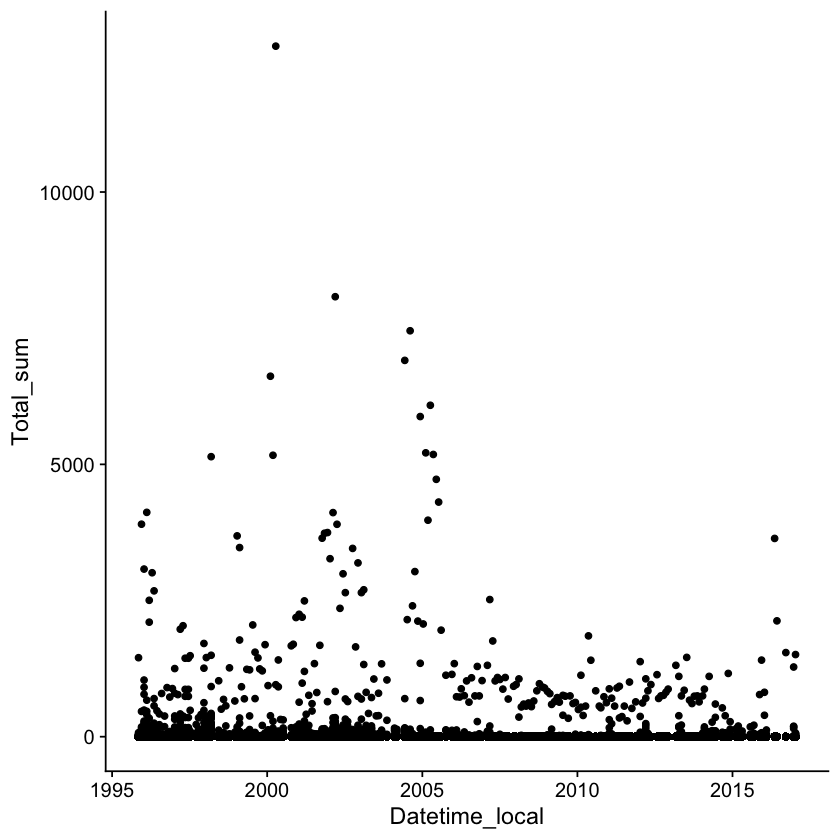

In [22]:
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=Total_sum))+
theme_cowplot()

In [4]:
#convert abundances to numbers
phydat_df$d_1m <- as.numeric(phydat_df$d_1m)

phydat_df$d_7m <- as.numeric(phydat_df$d_7m)

phydat_df$d_15m <- as.numeric(phydat_df$d_15m)

phydat_df$d_25m <- as.numeric(phydat_df$d_25m)

phydat_df$d_35m <- as.numeric(phydat_df$d_35m)

phydat_df$d_55m <- as.numeric(phydat_df$d_55m)

phydat_df$d_75m <- as.numeric(phydat_df$d_75m)

phydat_df$d_100m <- as.numeric(phydat_df$d_100m)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Warning message:
“Removed 1 rows containing missing values (geom_point).”

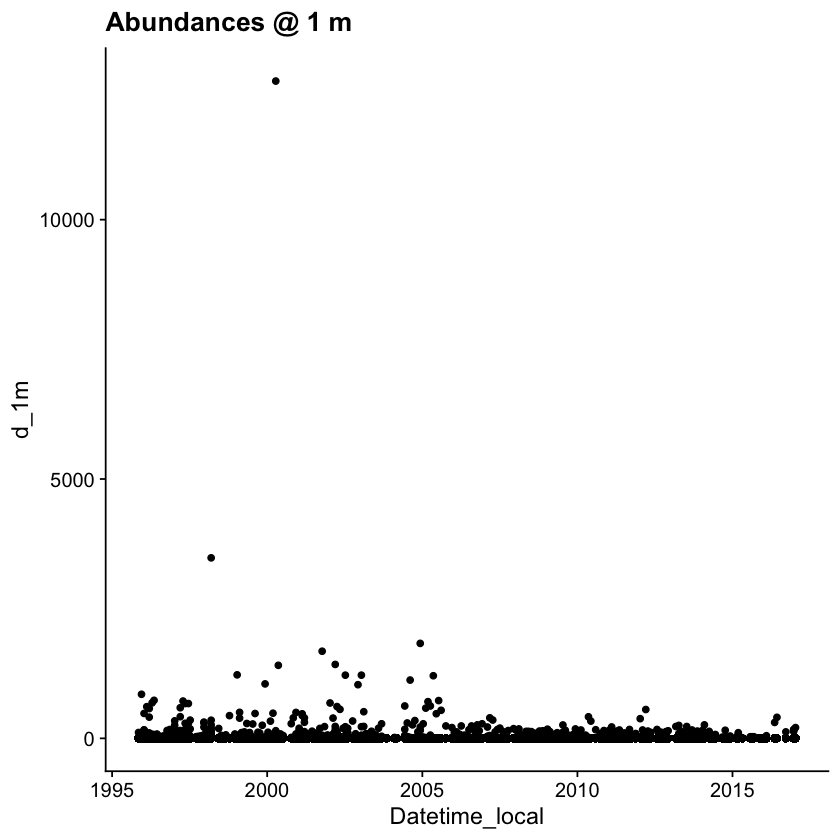

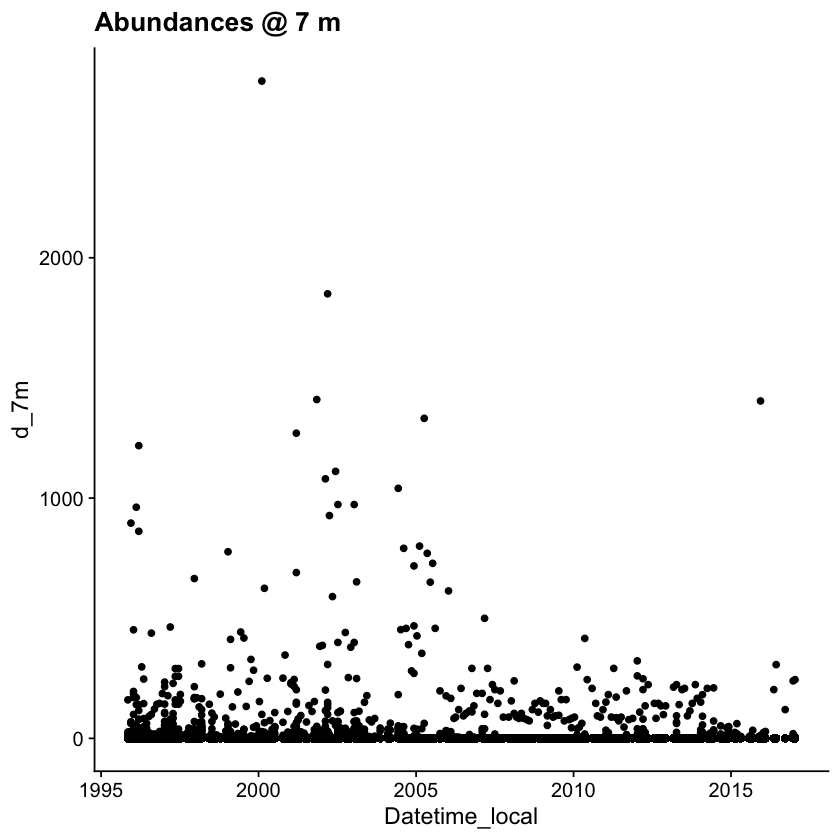

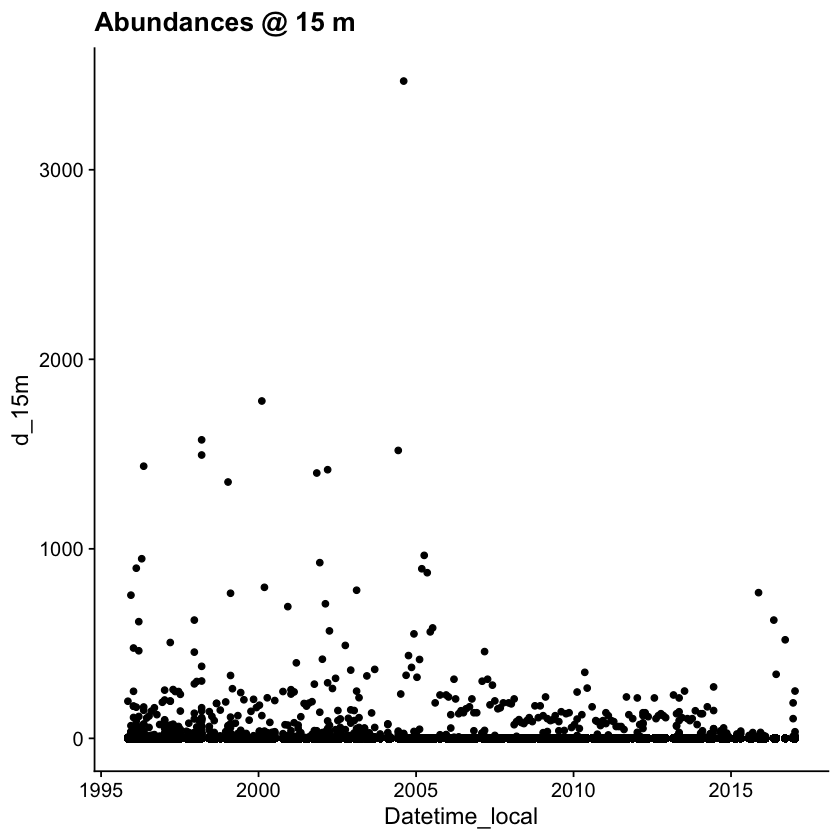

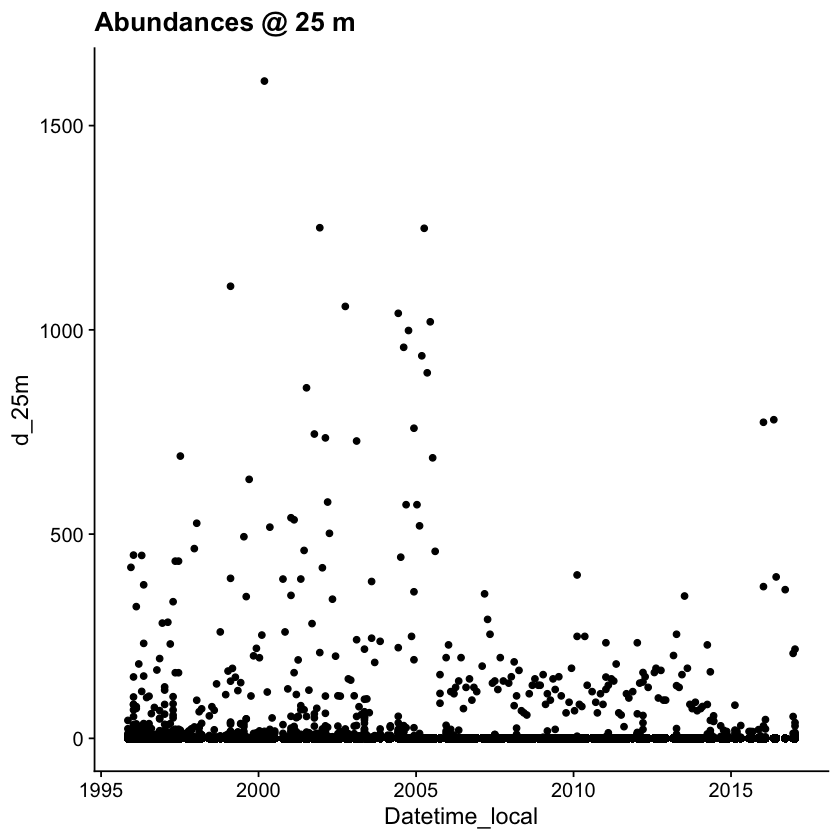

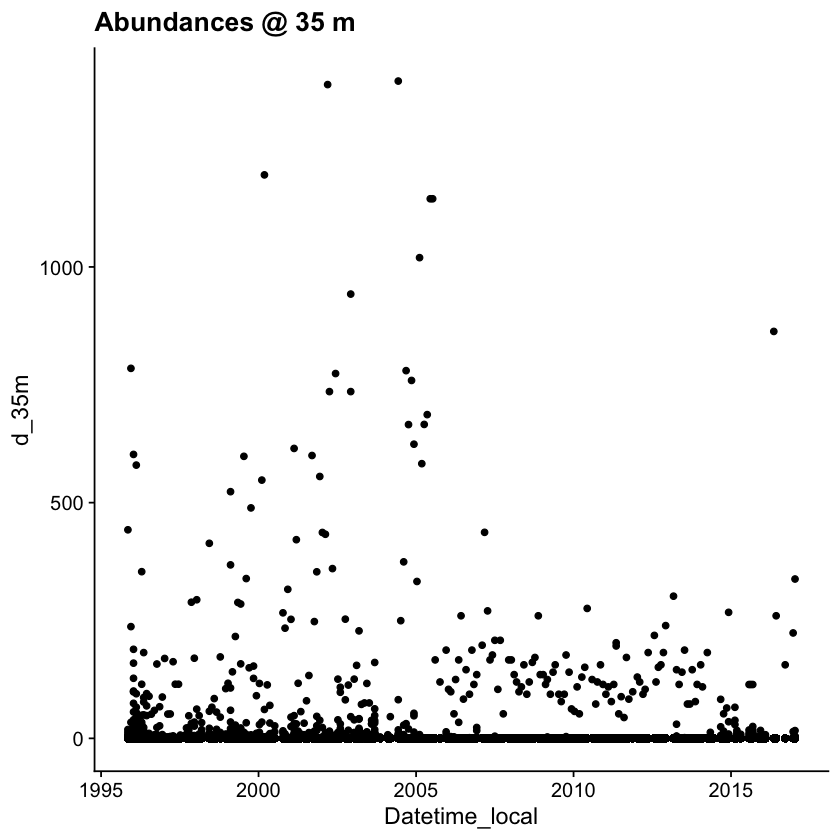

Warning message:
“Removed 619 rows containing missing values (geom_point).”

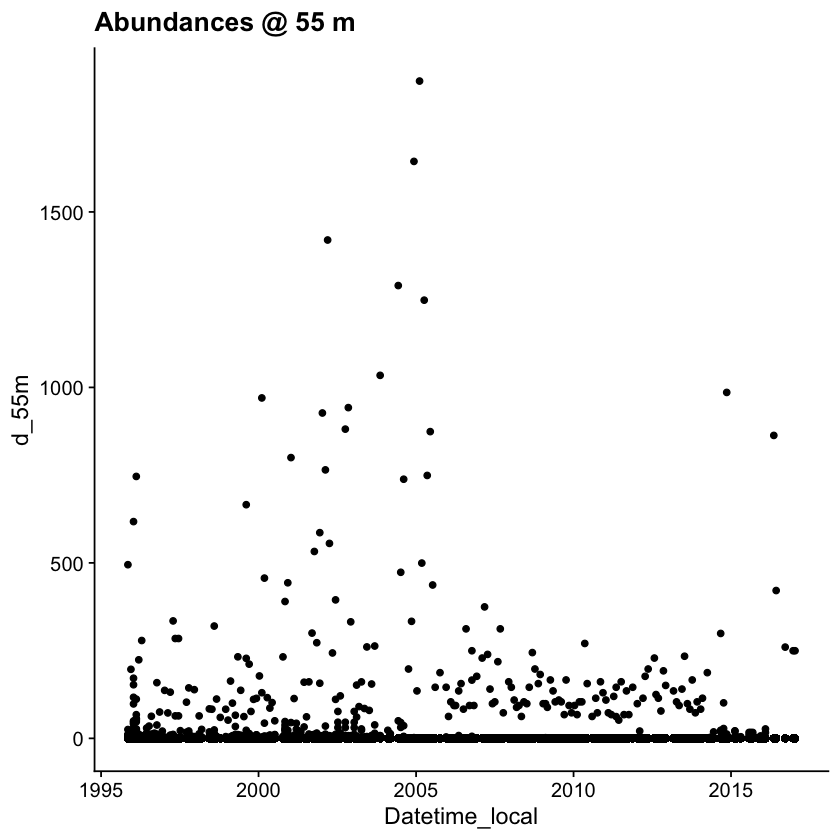

Warning message:
“Removed 619 rows containing missing values (geom_point).”

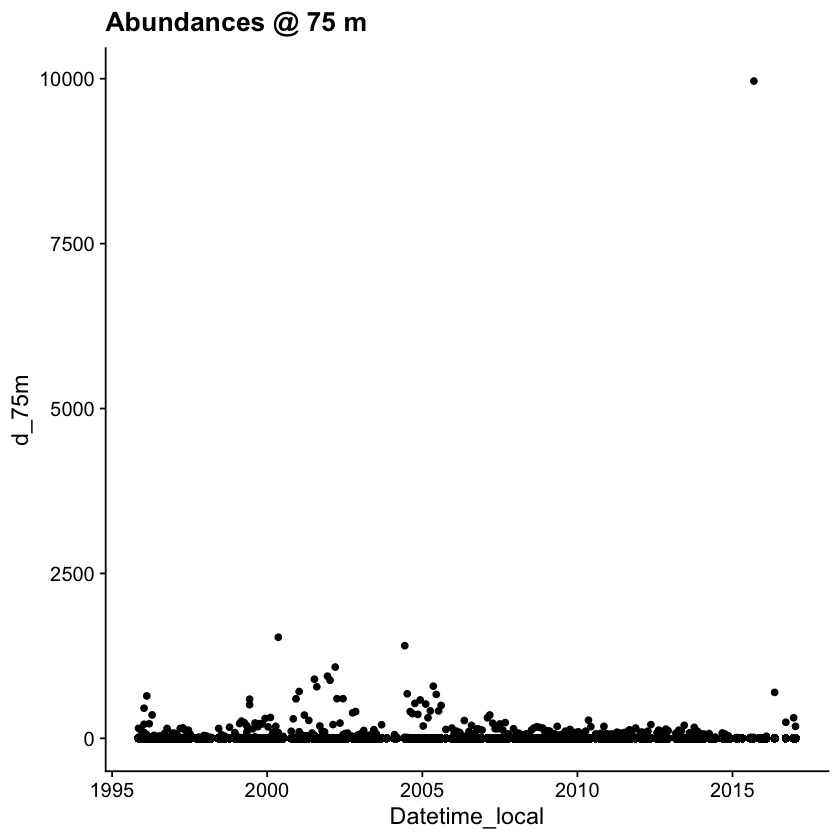

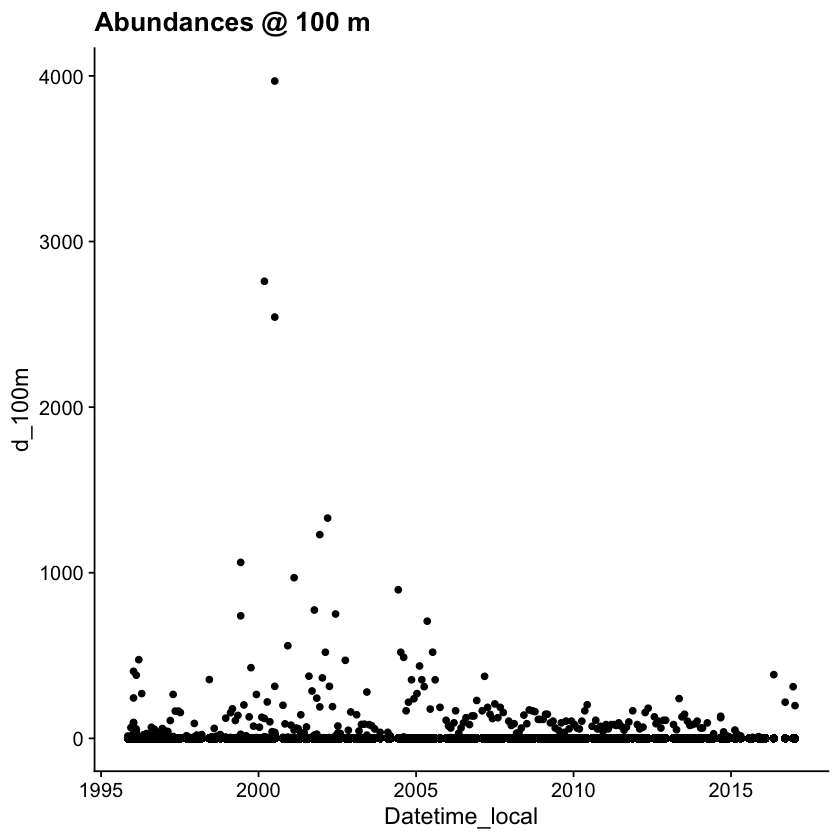

In [10]:
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_1m))+
theme_cowplot()+ggtitle('Abundances @ 1 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_7m))+
theme_cowplot()+ggtitle('Abundances @ 7 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_15m))+
theme_cowplot()+ggtitle('Abundances @ 15 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_25m))+
theme_cowplot()+ggtitle('Abundances @ 25 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_35m))+
theme_cowplot()+ggtitle('Abundances @ 35 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_55m))+
theme_cowplot()+ggtitle('Abundances @ 55 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_75m))+
theme_cowplot()+ggtitle('Abundances @ 75 m')
ggplot(data=phydat_df)+geom_point(aes(x=Datetime_local, y=d_100m))+
theme_cowplot()+ggtitle('Abundances @ 100 m')


In [11]:
date <- as.POSIXlt(as.character(dateRaw), format = "%Y%m%d", tz="GMT")

# prepare final data set
phyto <- data.frame(CruiseID,lon,lat,date,month,year,depth,taxon,group,abundance)

ERROR: Error in as.POSIXlt(as.character(dateRaw), format = "%Y%m%d", tz = "GMT"): object 'dateRaw' not found


In [8]:
# Write CSV in R
write.csv(phyto, file = "DATA_processed/Phytoplankton.csv")